In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid', font_scale=1.5)  #设置背景
plt.rcParams['font.sans-serif'] =['SimHei'] #设置字体，支持中文
plt.rcParams['axes.unicode_minus'] =False
import os

In [3]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype = str) #nrows=1000000，如果内存不够可以加上这个配置

In [4]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [5]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [6]:
data_user.describe() #得到地理位置有空置

,user_id,item_id,behavior_type,user_geohash,item_category,time
count,12256906,12256906,12256906,3922082,12256906,12256906
unique,10000,2876947,4,575458,8916,744
top,36233277,112921337,1,94ek6ke,1863,2014-12-11 22
freq,31030,1445,11550581,1052,393247,54797


In [7]:
#2.1 缺失值分析，apply默认对列进行操作，x代表一列
data_user.apply(lambda x: sum(x.isnull())/len(x))

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

In [8]:
#统计多少条是空的
data_user.apply(lambda x: sum(x.isnull()))

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [9]:
data_user.shape

(12256906, 6)

In [10]:
#把日期和小时分别取出来，从日期，小时两个角度分析购物行为
data_user['date'] = data_user['time'].str[0:10]

In [11]:
#把小时取出来
data_user['hour'] = data_user['time'].str[11:]  #如果发生溢出就分开执行

In [12]:
data_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [13]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [14]:
#类型转换
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time']= pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(np.int8) #可以改为np.int8

In [15]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                       int8
dtype: object

In [16]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [17]:
#对数据按时间进行一下排序
data_user.sort_values(by ='time',ascending=True,inplace = True)

In [18]:
data_user.tail()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
5241608,132653097,119946062,2,NaN,6054,2014-12-18 23:00:00,2014-12-18,23
10296029,130082553,296196819,1,NaN,11532,2014-12-18 23:00:00,2014-12-18,23
8527264,43592945,350594832,1,9rhhgph,9541,2014-12-18 23:00:00,2014-12-18,23
6263497,12833799,186993938,1,954g37v,3798,2014-12-18 23:00:00,2014-12-18,23
9200479,77522552,69292191,1,NaN,889,2014-12-18 23:00:00,2014-12-18,23


In [20]:
#丢弃原有索引，按位置重新生成索引，在原有df生效
data_user.reset_index(drop =True,inplace =True)

In [21]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [22]:
# top是出现最多次数的那个str值，freq是top内的值出现的次数
data_user.describe(include = ['object'])  #第二行可以看出行为类型，用户位置类别，商品品类

,user_id,item_id,behavior_type,user_geohash,item_category
count,12256906,12256906,12256906,3922082,12256906
unique,10000,2876947,4,575458,8916
top,36233277,112921337,1,94ek6ke,1863
freq,31030,1445,11550581,1052,393247


In [23]:
data_user.describe()

,time,date,hour
count,12256906,12256906,1.225691e+07
mean,2014-12-04 04:47:28.445702144,2014-12-03 13:58:23.675396352,1.481799e+01
min,2014-11-18 00:00:00,2014-11-18 00:00:00,0.000000e+00
25%,2014-11-26 15:00:00,2014-11-26 00:00:00,1.000000e+01
50%,2014-12-04 14:00:00,2014-12-04 00:00:00,1.600000e+01
75%,2014-12-11 23:00:00,2014-12-11 00:00:00,2.000000e+01
max,2014-12-18 23:00:00,2014-12-18 00:00:00,2.300000e+01
std,NaN,NaN,6.474778e+00


In [24]:
#可能是刷单的用户
data_user[data_user['user_id']=='36233277']

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
40360,36233277,147216340,1,94ek6lk,4721,2014-11-18 07:00:00,2014-11-18,7
40411,36233277,145482943,1,94ek6ln,7344,2014-11-18 07:00:00,2014-11-18,7
40526,36233277,302098857,1,94ek6kg,7344,2014-11-18 07:00:00,2014-11-18,7
40859,36233277,180885547,1,94ek6l1,4721,2014-11-18 07:00:00,2014-11-18,7
41017,36233277,113357921,1,94ek6as,4721,2014-11-18 07:00:00,2014-11-18,7
...,...,...,...,...,...,...,...,...
12255805,36233277,260021102,1,94ek6ke,2825,2014-12-18 23:00:00,2014-12-18,23
12255823,36233277,312712899,1,94ek6ln,1863,2014-12-18 23:00:00,2014-12-18,23
12255850,36233277,34128930,1,94ek6ep,9835,2014-12-18 23:00:00,2014-12-18,23
12255932,36233277,116229820,1,94ek6lr,1863,2014-12-18 23:00:00,2014-12-18,23


In [25]:
#把时间作为类别
data_user.describe(include = 'all')

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,12256906,12256906,12256906,3922082,12256906,12256906,12256906,1.225691e+07
unique,10000,2876947,4,575458,8916,NaN,NaN,NaN
top,36233277,112921337,1,94ek6ke,1863,NaN,NaN,NaN
freq,31030,1445,11550581,1052,393247,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2014-12-04 04:47:28.445702144,2014-12-03 13:58:23.675396352,1.481799e+01
min,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2014-11-26 15:00:00,2014-11-26 00:00:00,1.000000e+01
50%,NaN,NaN,NaN,NaN,NaN,2014-12-04 14:00:00,2014-12-04 00:00:00,1.600000e+01
75%,NaN,NaN,NaN,NaN,NaN,2014-12-11 23:00:00,2014-12-11 00:00:00,2.000000e+01
max,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,2.300000e+01


In [26]:
#计算pv，后面选任何一列即可，可以选item_id，每一列是等价的
pv_daily = data_user.groupby('date').count()['user_id']
pv_daily

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
2014-11-23    382702
2014-11-24    378342
2014-11-25    370239
2014-11-26    360896
2014-11-27    371384
2014-11-28    340638
2014-11-29    364697
2014-11-30    401620
2014-12-01    394611
2014-12-02    405216
2014-12-03    411606
2014-12-04    399952
2014-12-05    361878
2014-12-06    389610
2014-12-07    399751
2014-12-08    386667
2014-12-09    398025
2014-12-10    421910
2014-12-11    488508
2014-12-12    691712
2014-12-13    407160
2014-12-14    402541
2014-12-15    398356
2014-12-16    395085
2014-12-17    384791
2014-12-18    375597
Name: user_id, dtype: int64

In [27]:
#改为user_id1的目的是为了下面命名为pv,uv做准备
pv_daily = pv_daily.rename('user_id1') #注意这里一定要写赋值

In [28]:
#不设置下面内容，避免显示崩溃
#显示所有列
pd.set_option('display.max_columns', 30)
#显示所有行
pd.set_option('display.max_rows', 100)

In [29]:
#是每一组的前3个,这里没用，没聚合
data_user.groupby('date')['user_id'].head(80)

0            73462715
1            36090137
2            40459733
3              814199
4           113309982
              ...    
11881384    125193088
11881385     81635499
11881386    125193088
11881387     73455580
11881388     90792846
Name: user_id, Length: 2480, dtype: object

In [30]:
#如何计算uv，针对用户访问进行去重，再计算数目
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())


In [31]:
uv_daily.head(n=35)

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
2014-11-23    6373
2014-11-24    6513
2014-11-25    6351
2014-11-26    6357
2014-11-27    6359
2014-11-28    6189
2014-11-29    6224
2014-11-30    6379
2014-12-01    6544
2014-12-02    6550
2014-12-03    6585
2014-12-04    6531
2014-12-05    6367
2014-12-06    6440
2014-12-07    6422
2014-12-08    6564
2014-12-09    6566
2014-12-10    6652
2014-12-11    6894
2014-12-12    7720
2014-12-13    6776
2014-12-14    6668
2014-12-15    6787
2014-12-16    6729
2014-12-17    6643
2014-12-18    6582
Name: user_id, dtype: int64

In [33]:
data_user

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18 00:00:00,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18 00:00:00,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18 00:00:00,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18 00:00:00,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18 00:00:00,2014-11-18,0
...,...,...,...,...,...,...,...,...
12256901,132653097,119946062,2,NaN,6054,2014-12-18 23:00:00,2014-12-18,23
12256902,130082553,296196819,1,NaN,11532,2014-12-18 23:00:00,2014-12-18,23
12256903,43592945,350594832,1,9rhhgph,9541,2014-12-18 23:00:00,2014-12-18,23
12256904,12833799,186993938,1,954g37v,3798,2014-12-18 23:00:00,2014-12-18,23


In [34]:
#得到所有的用户数量,1万人
data_user['user_id'].nunique()

10000

In [35]:
#pv和uv结合在一起，变为df
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)


In [36]:
pv_uv_daily.head()

,user_id1,user_id
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [37]:
#改列名
pv_uv_daily.rename(columns={'user_id1':'pv','user_id':'uv'},inplace =True)

In [38]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [41]:
#写入文件
pv_uv_daily.to_excel('pv_uv.xlsx')

In [42]:
pv_daily.head()

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
Name: user_id1, dtype: int64

In [43]:
pv_daily.index

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', name='date', freq=None)

In [44]:
range(len(pv_daily))

range(0, 31)

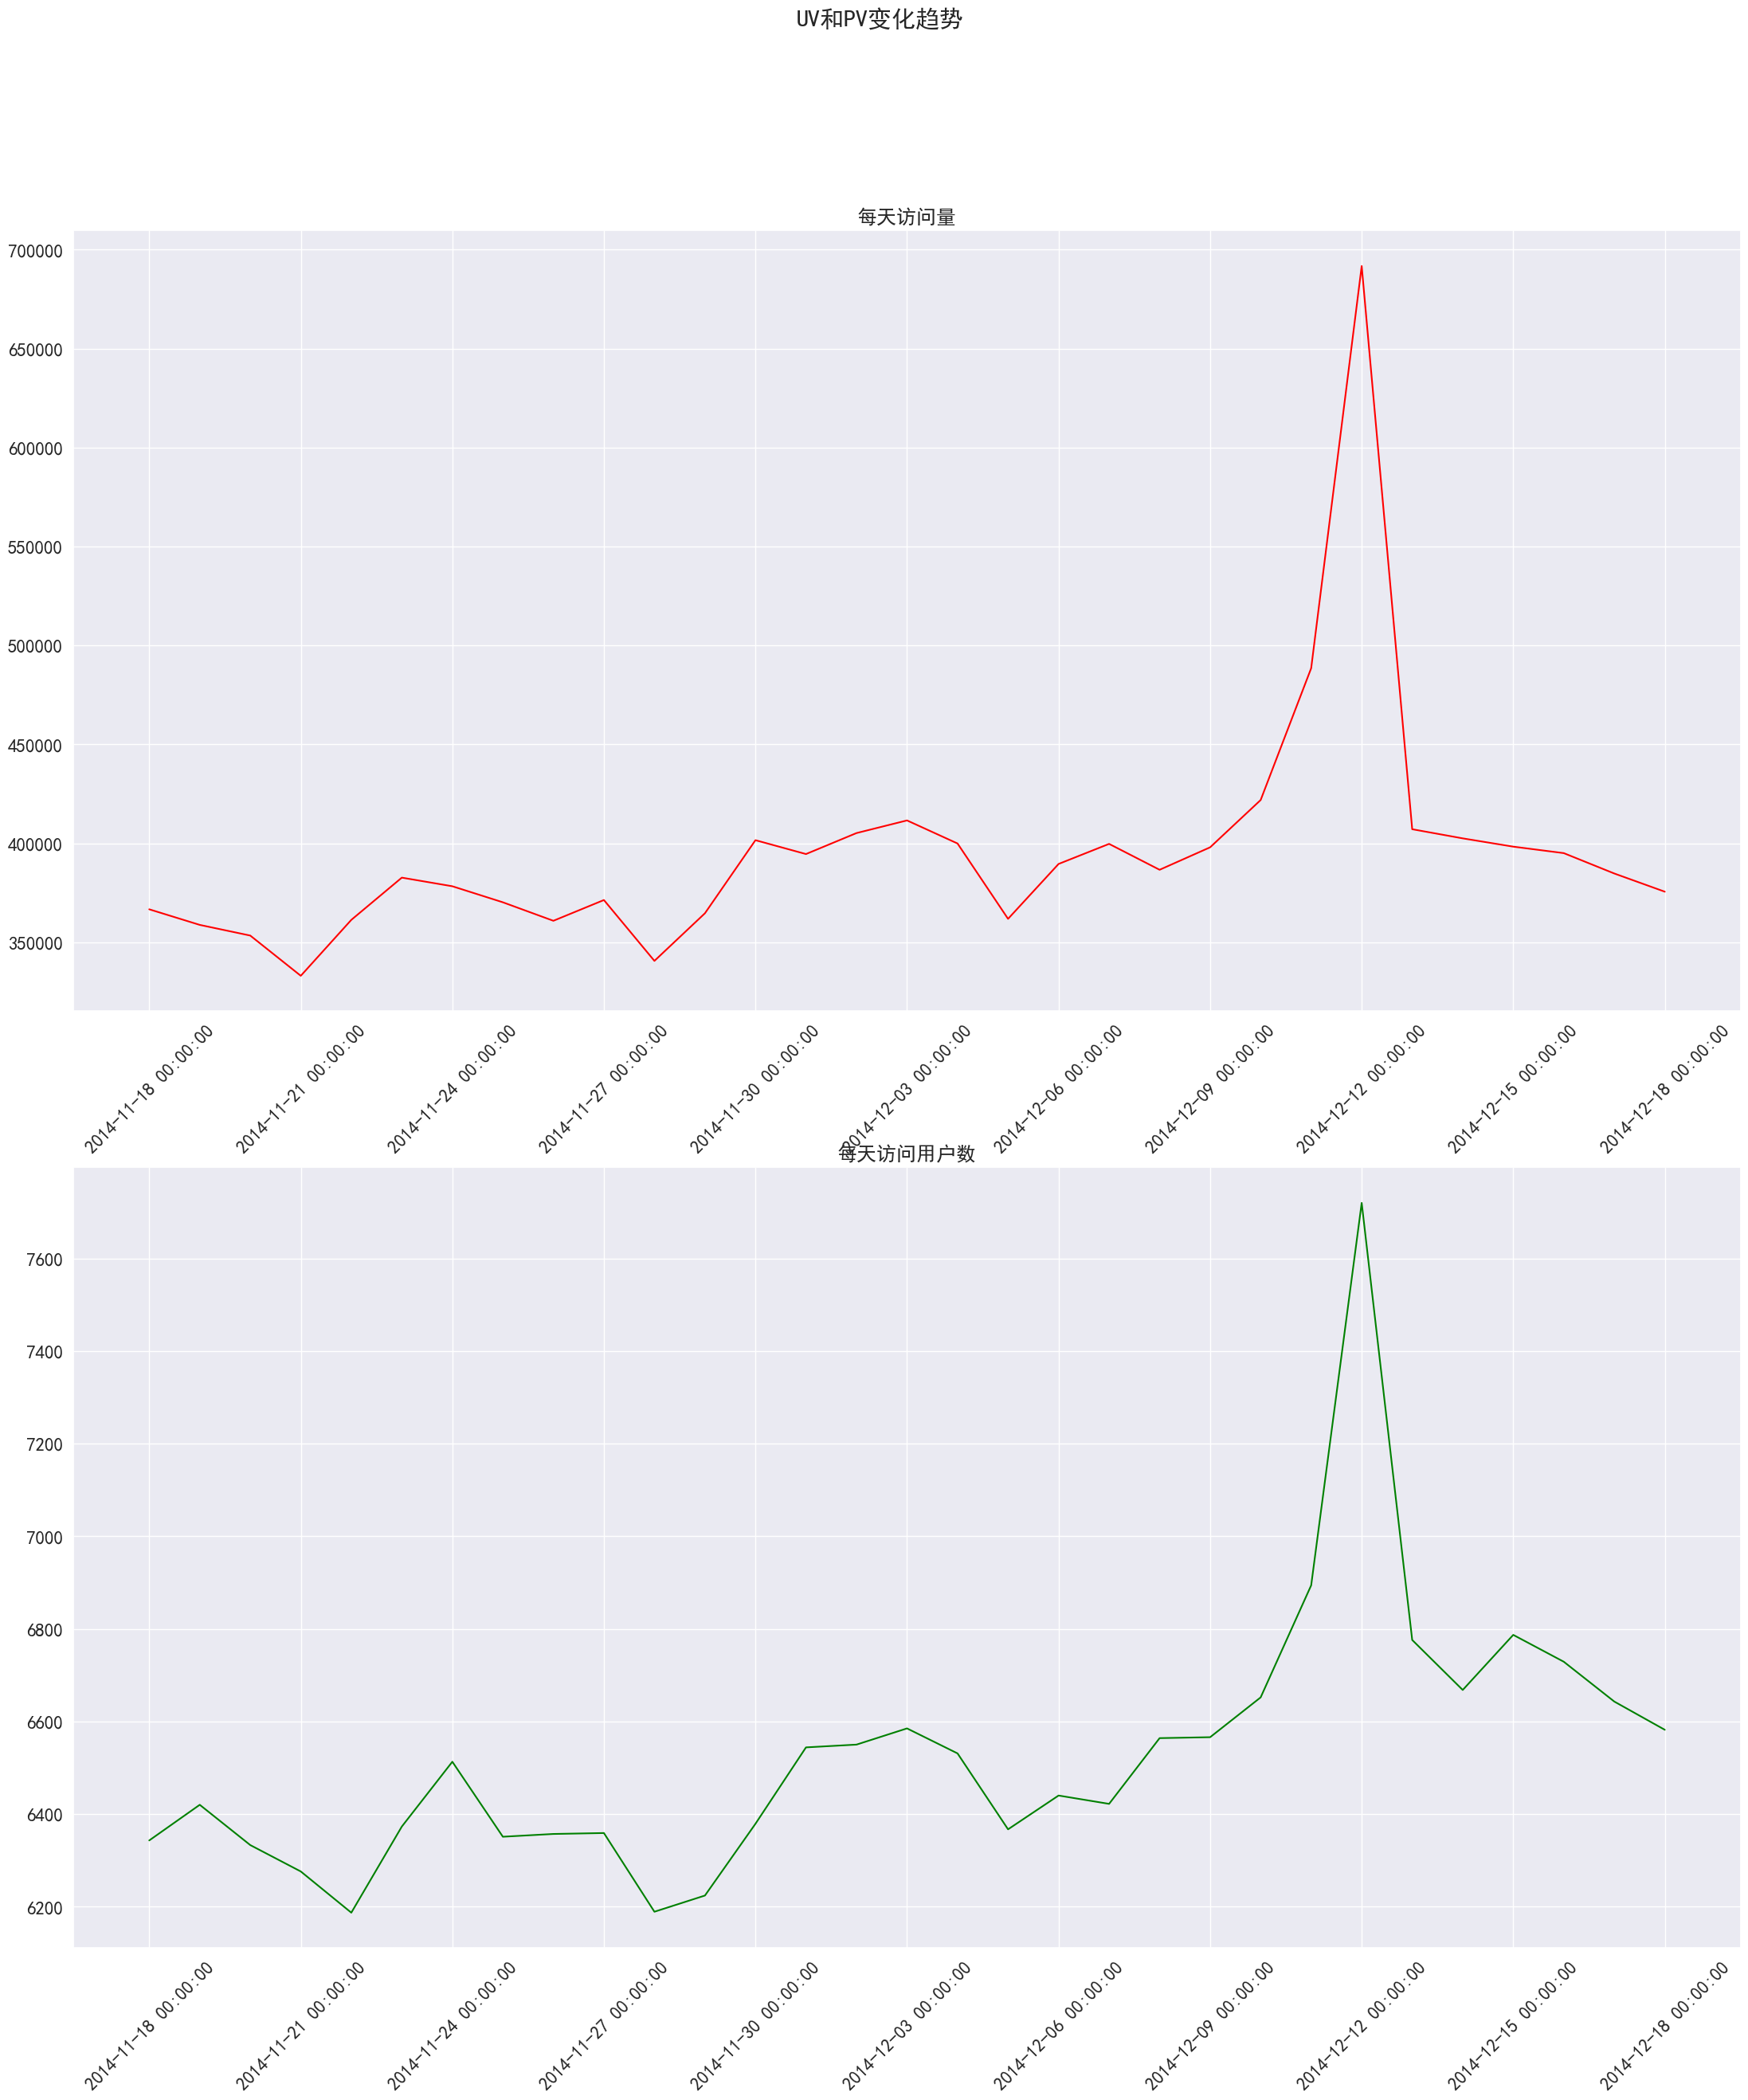

In [45]:
#默认显示一个月的区别
plt.figure(figsize=(27,28))
plt.subplot(211)  #等价于2,1,2，是2行1列图，这里是第一个图
plt.plot(pv_daily, color='red')  #pv_daily是一个series，
plt.xticks(pv_daily.index[::3],pv_daily.index[::3], rotation=45)
plt.title('每天访问量')
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.xticks(uv_daily.index[::3],uv_daily.index[::3], rotation=45)
plt.title('每天访问用户数')
plt.suptitle('UV和PV变化趋势')
plt.show()

In [46]:
#小时的pv,30天的某个小时
pv_daily = data_user.groupby('hour').count()['user_id']

In [47]:
pv_daily.head(30)

hour
0      517404
1      267682
2      147090
3       98516
4       80487
5       88296
6      158798
7      287337
8      396106
9      485951
10     550665
11     526940
12     531957
13     598343
14     594215
15     598849
16     576207
17     505936
18     547383
19     735192
20     935161
21    1090178
22    1088961
23     849252
Name: user_id, dtype: int64

In [48]:
uv_daily = data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())
uv_daily.head(30)

hour
0     5786
1     3780
2     2532
3     1937
4     1765
5     2030
6     3564
7     5722
8     7108
9     7734
10    8139
11    8239
12    8314
13    8352
14    8255
15    8257
16    8320
17    8228
18    8278
19    8538
20    8780
21    8866
22    8599
23    7484
Name: user_id, dtype: int64

In [49]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [50]:
pv_uv_daily.columns=['pv','uv'] #另外一种换索引名字的方式

In [51]:
pv_uv_daily.head()

,pv,uv
hour,,
0,517404,5786
1,267682,3780
2,147090,2532
3,98516,1937
4,80487,1765


In [52]:
pv_daily.max()

np.int64(1090178)

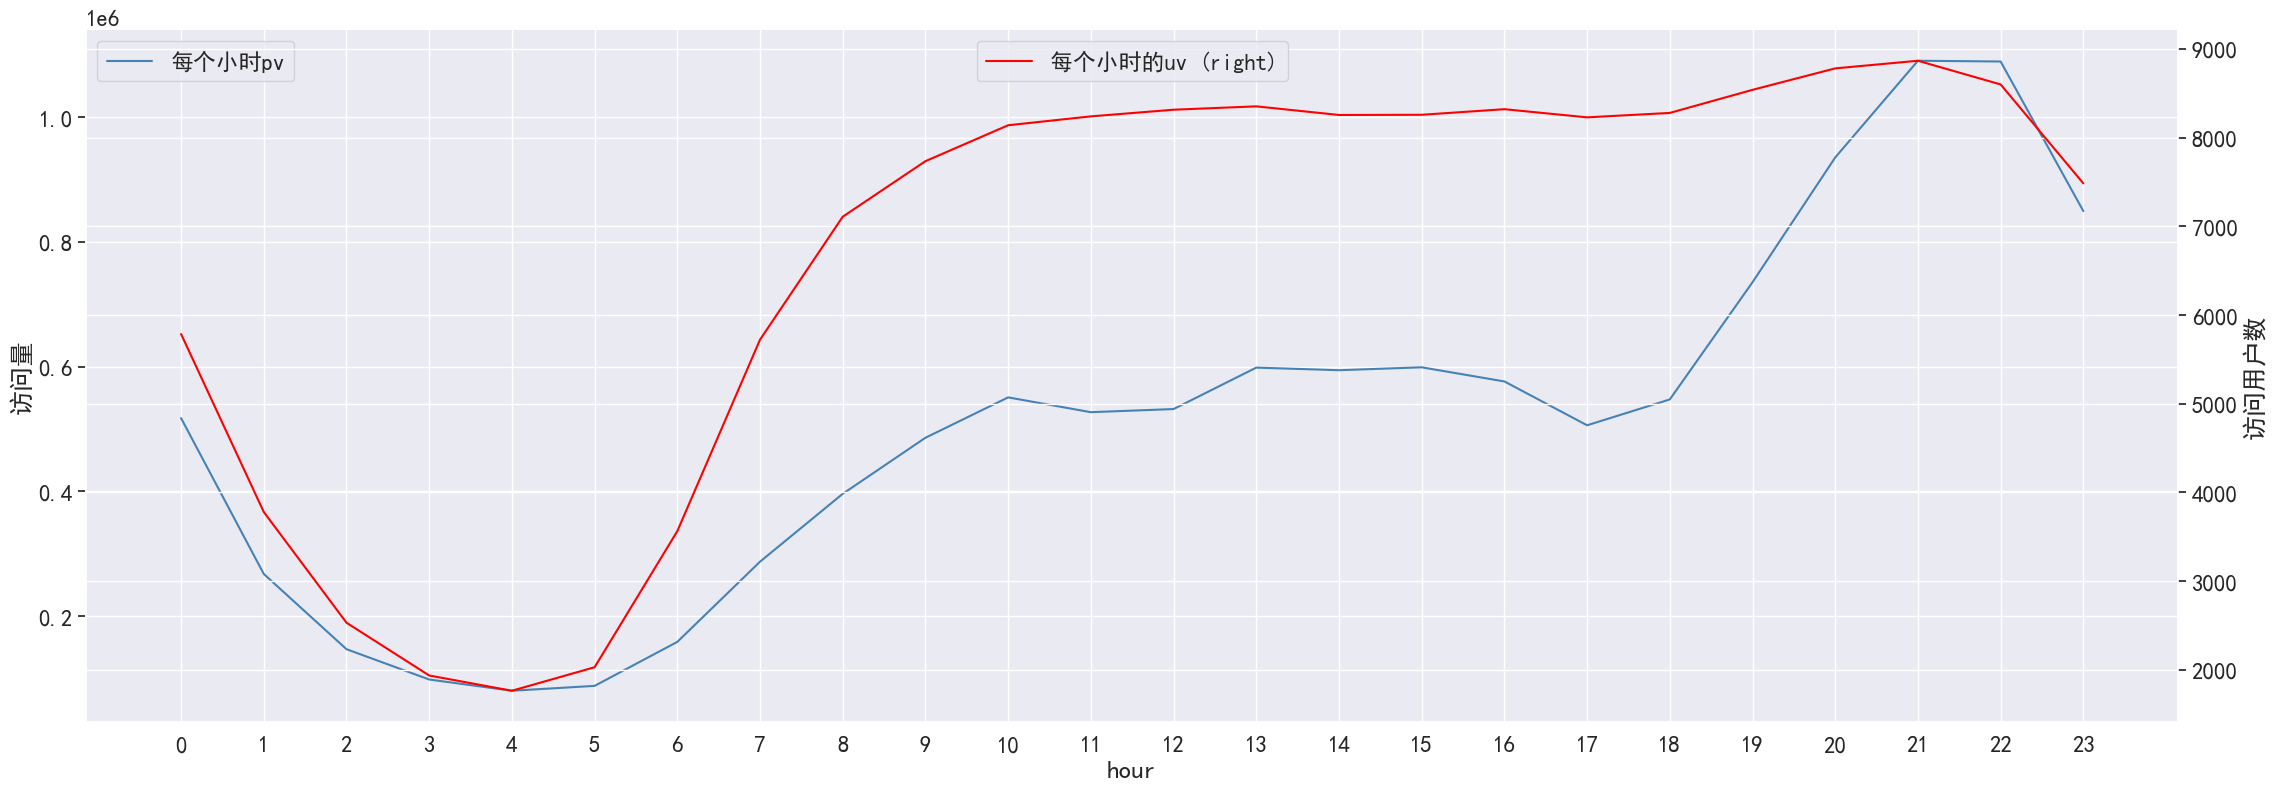

In [53]:
plt.figure(figsize=(27,9))
pv_uv_daily['pv'].plot(color= 'steelblue', label ='每个小时pv')
plt.legend(loc ='upper center')
plt.ylabel('访问量')
pv_uv_daily['uv'].plot(color= 'red', label='每个小时的uv',secondary_y =True)
plt.ylabel('访问用户数')
plt.xticks(range(0,24),pv_uv_daily.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()


In [54]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [55]:
#先看下上面的数据
pv_detail = pd.pivot_table(columns ='behavior_type',index ='hour' , data = data_user,values = 'user_id',aggfunc=np.size)

In [56]:
pv_detail.shape

(24, 4)

In [57]:
pv_detail #点击、收藏、加入购物车和支付 的比例

behavior_type,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586


In [58]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                       int8
dtype: object

In [59]:
pv_detail.loc[:,'1']

hour
0      487341
1      252991
2      139139
3       93250
4       75832
5       83545
6      150356
7      272470
8      374701
9      456781
10     515960
11     493679
12     500036
13     561513
14     558246
15     562238
16     541846
17     476369
18     517078
19     696035
20     885669
21    1030483
22    1027269
23     797754
Name: 1, dtype: int64

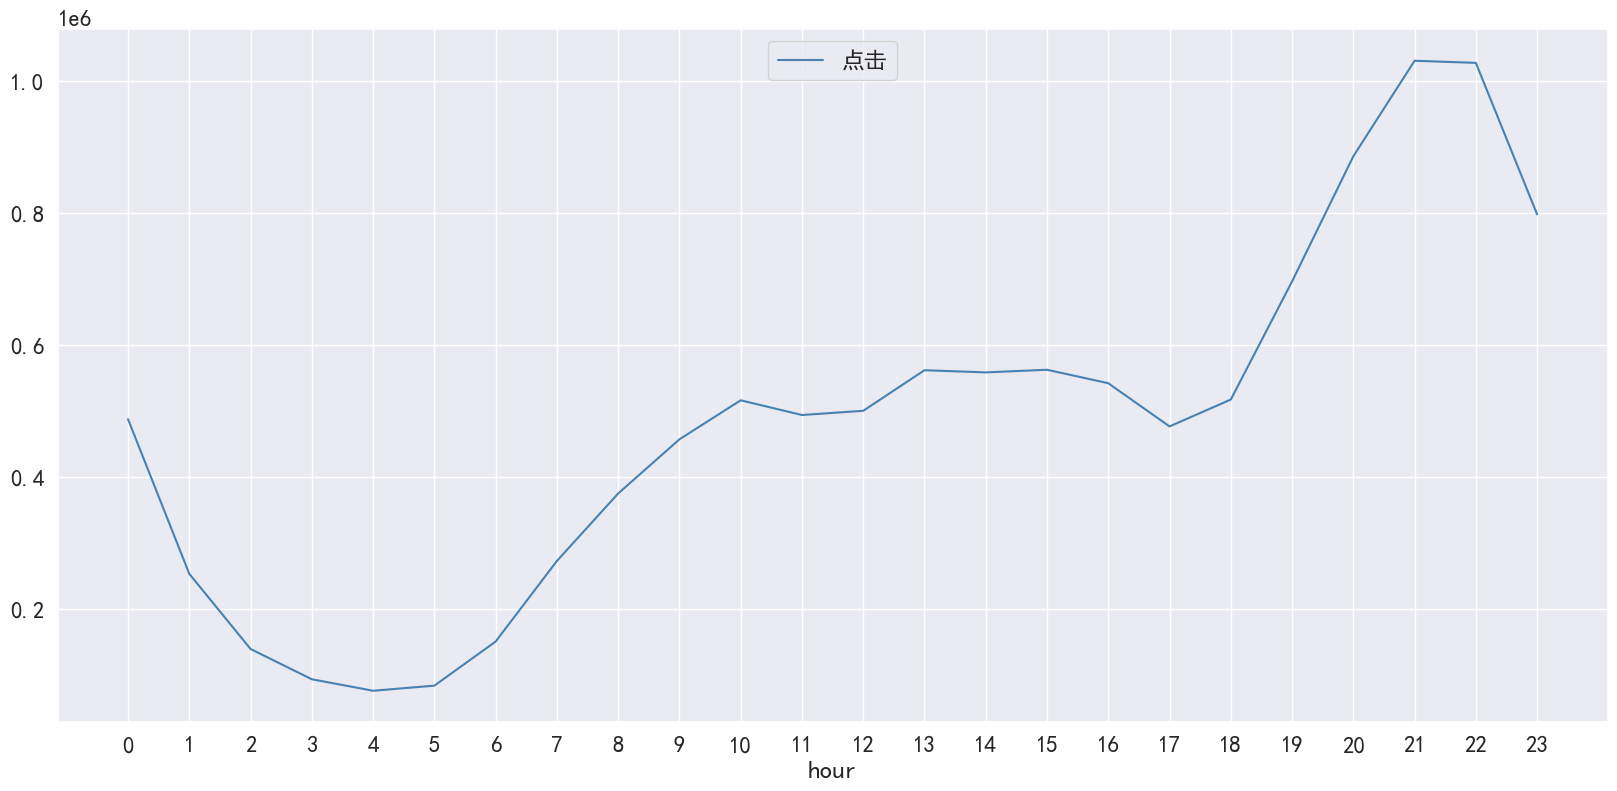

In [60]:
plt.figure(figsize=(20,9))
pv_detail.loc[:,'1'].plot(color= 'steelblue', label ='点击')
plt.xticks(range(0,24),pv_detail.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()

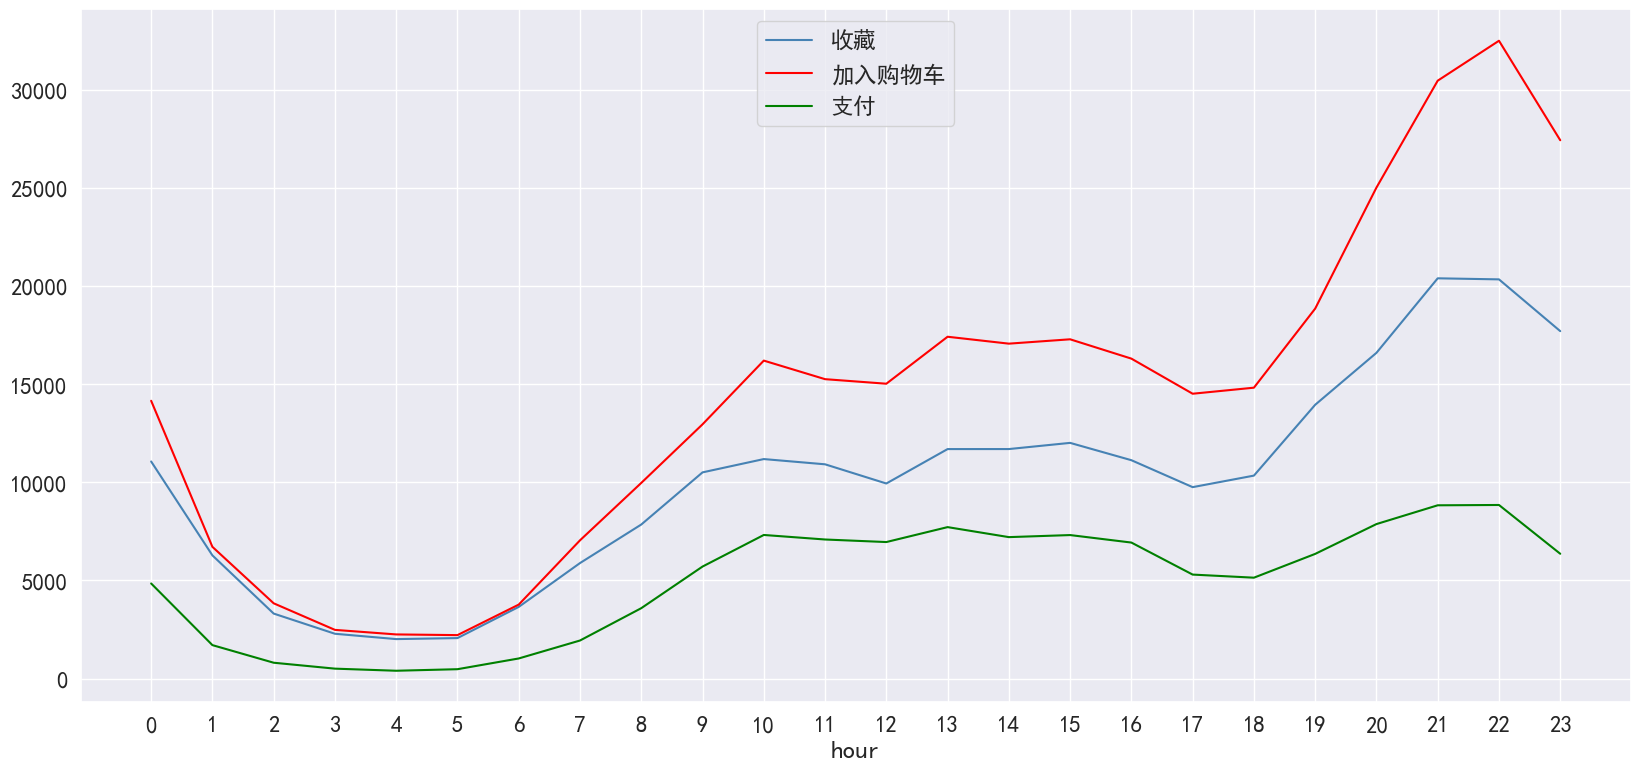

In [61]:
plt.figure(figsize=(20,9))
plt.xticks(range(0,24),pv_detail.index)
pv_detail.loc[:,'2'].plot(color= 'steelblue', label ='收藏')
pv_detail.loc[:,'3'].plot(color= 'red', label ='加入购物车')
pv_detail.loc[:,'4'].plot(color= 'green', label ='支付')
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()

In [62]:
data_user_buy = data_user[data_user.behavior_type =='4'].groupby('user_id').size()

In [63]:
data_user_buy.head()  #每个用户的购买次数

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
dtype: int64

In [64]:
data_user_buy.shape  #有多少用户发生了支付行为

(8886,)

In [65]:
data_user_buy.describe()  #可以知道大部分用户一个月的购买次数是8次

count    8886.000000
mean       13.527459
std        19.698786
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       809.000000
dtype: float64

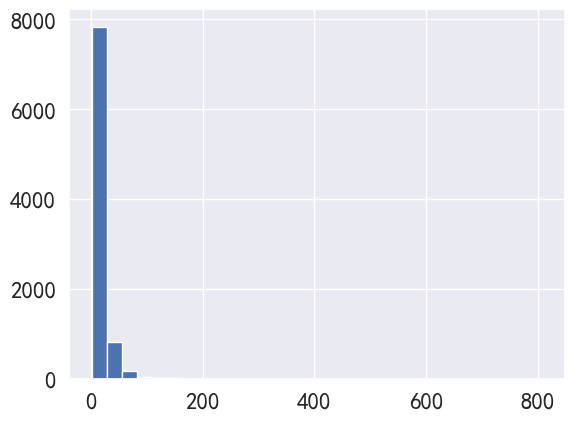

In [66]:
plt.hist(x =data_user_buy, bins=30)
plt.show()
#通过图形发现大部分人的购买次数都小于20次，做一下处理，再画直方图

In [67]:
data_user_buy[data_user_buy<=20].shape  #有多少用户的购买次数小于20次

(7182,)

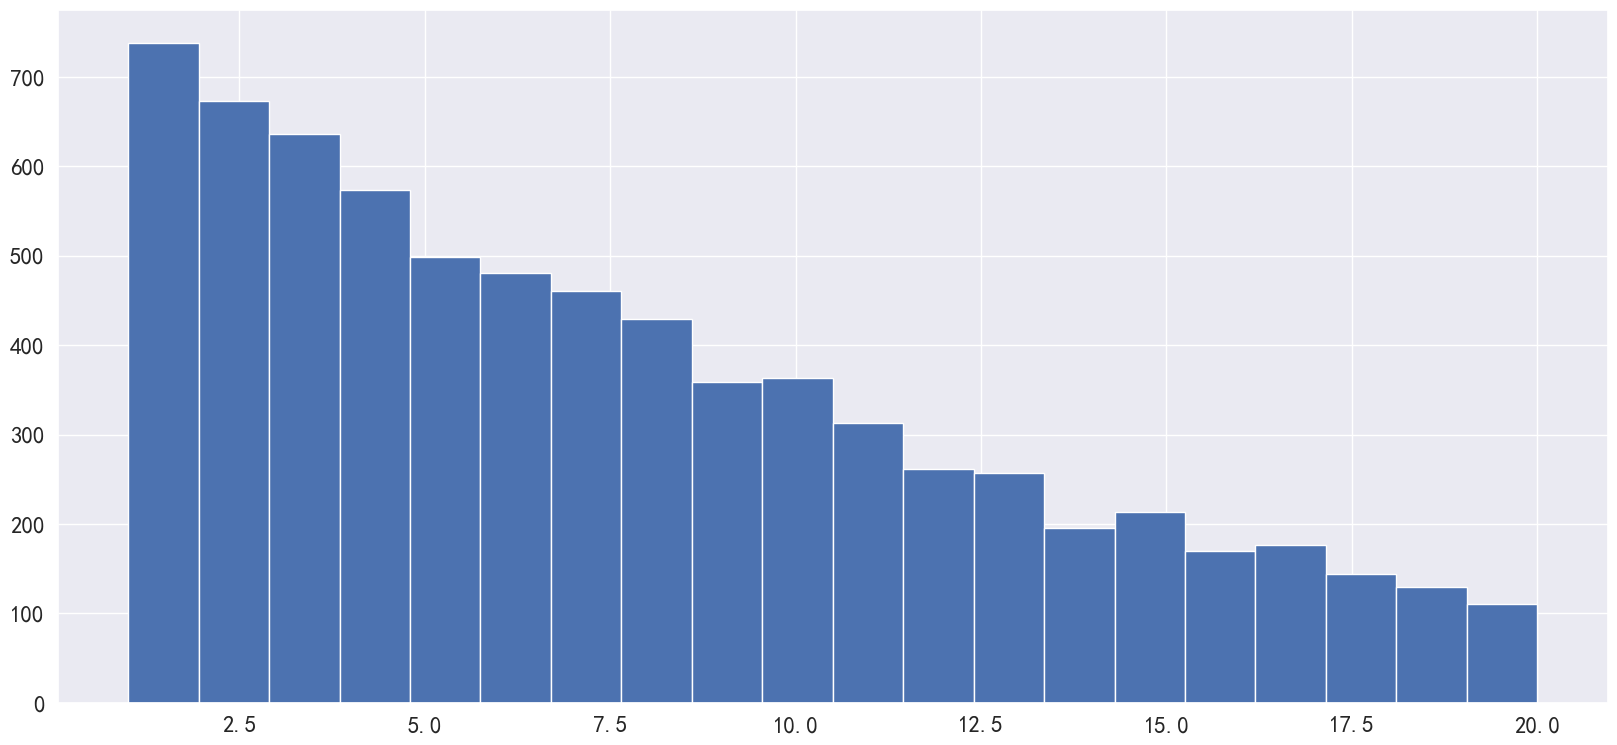

In [68]:
plt.figure(figsize=(20,9))
plt.hist(x =data_user_buy[data_user_buy<=20], bins=20)
plt.show()

In [69]:
data_user_buy.sum()*50/10000  #月ARPU值，这里假设每次花费50元，10000个的用户

np.float64(601.025)

In [70]:
# 月ARPPU
data_user_buy.sum()*50/8886

np.float64(676.3729462075174)

In [71]:
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id'])

In [72]:
data_user_buy1.count().shape

(49201, 6)

In [73]:
data_user_buy1.count().head()

item_id  behavior_type  user_geohash  item_category  \
date       user_id                                                          
2014-11-18 100001878        1              1             1              1   
           100014060        2              2             2              2   
           100024529        6              6             0              6   
           100027681        3              3             0              3   
           10004287         2              2             0              2   

                      time  hour  
date       user_id                
2014-11-18 100001878     1     1  
           100014060     2     2  
           100024529     6     6  
           100027681     3     3  
           10004287      2     2

In [74]:
data_user_buy1.count().index

MultiIndex([('2014-11-18', '100001878'),
            ('2014-11-18', '100014060'),
            ('2014-11-18', '100024529'),
            ('2014-11-18', '100027681'),
            ('2014-11-18',  '10004287'),
            ('2014-11-18', '100128093'),
            ('2014-11-18', '100326985'),
            ('2014-11-18', '100559064'),
            ('2014-11-18', '100684618'),
            ('2014-11-18', '100816273'),
            ...
            ('2014-12-18',  '98894859'),
            ('2014-12-18',   '9900390'),
            ('2014-12-18',  '99346682'),
            ('2014-12-18',  '99393465'),
            ('2014-12-18',  '99418963'),
            ('2014-12-18',  '99674599'),
            ('2014-12-18',  '99785045'),
            ('2014-12-18',  '99791909'),
            ('2014-12-18',  '99795650'),
            ('2014-12-18',  '99796276')],
           names=['date', 'user_id'], length=49201)

In [75]:
 #按照日期不同用户的购买行为次数
#reset_index会把原有的index变为数据列
data_user_buy1.count()['behavior_type'].reset_index().rename(columns={'behavior_type':' total'}).head()

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2


In [76]:
 #按照日期不同用户的购买行为次数
#把上面两步二和一
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id']).\
count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})

In [77]:
data_user_buy1.head()

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2


In [78]:
data_user_buy1.describe()

,date,total
count,49201,49201.000000
mean,2014-12-03 14:07:33.795654400,2.443141
min,2014-11-18 00:00:00,1.000000
25%,2014-11-26 00:00:00,1.000000
50%,2014-12-04 00:00:00,1.000000
75%,2014-12-12 00:00:00,3.000000
max,2014-12-18 00:00:00,185.000000
std,NaN,3.307288


In [79]:
#每一天总计有多少用户产生了购买
data_user_buy1.groupby('date').count()['total']

date
2014-11-18    1539
2014-11-19    1511
2014-11-20    1492
2014-11-21    1330
2014-11-22    1411
2014-11-23    1436
2014-11-24    1524
2014-11-25    1497
2014-11-26    1487
2014-11-27    1527
2014-11-28    1442
2014-11-29    1377
2014-11-30    1534
2014-12-01    1657
2014-12-02    1585
2014-12-03    1697
2014-12-04    1585
2014-12-05    1493
2014-12-06    1452
2014-12-07    1403
2014-12-08    1551
2014-12-09    1429
2014-12-10    1442
2014-12-11    1449
2014-12-12    3897
2014-12-13    1549
2014-12-14    1506
2014-12-15    1627
2014-12-16    1650
2014-12-17    1570
2014-12-18    1552
Name: total, dtype: int64

In [80]:
data_user_buy1.groupby('date').sum()['total']

date
2014-11-18     3730
2014-11-19     3686
2014-11-20     3462
2014-11-21     3021
2014-11-22     3570
2014-11-23     3347
2014-11-24     3426
2014-11-25     3464
2014-11-26     3573
2014-11-27     3670
2014-11-28     3218
2014-11-29     3211
2014-11-30     3616
2014-12-01     3909
2014-12-02     3621
2014-12-03     3885
2014-12-04     3691
2014-12-05     3319
2014-12-06     3272
2014-12-07     3256
2014-12-08     3419
2014-12-09     3449
2014-12-10     3216
2014-12-11     3226
2014-12-12    15251
2014-12-13     3478
2014-12-14     3483
2014-12-15     3764
2014-12-16     3771
2014-12-17     3615
2014-12-18     3586
Name: total, dtype: int64

In [82]:
#日ARPPU，每一天的不等的
data_user_buy2=data_user_buy1.groupby('date').sum()['total']/\
               data_user_buy1.groupby('date').count()['total']

In [83]:
data_user_buy2

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

In [84]:
data_user_buy1.groupby('date')['total'].mean()  #另外一种计算方法

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

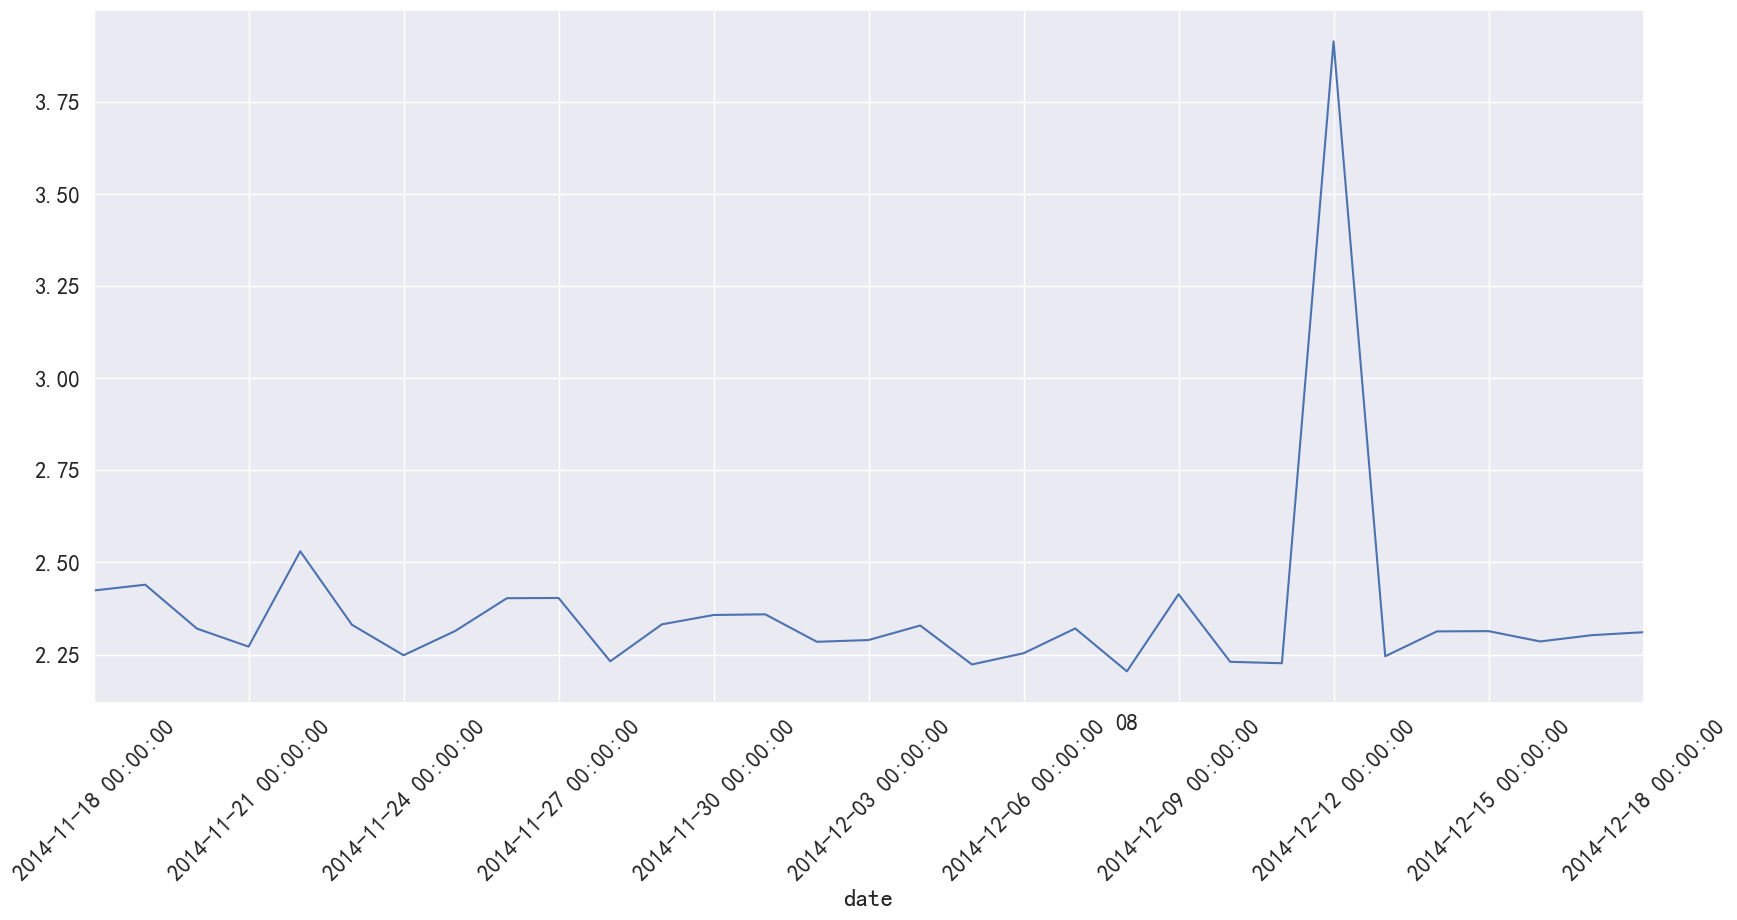

In [85]:
#设置画布尺寸
plt.figure(figsize=(20,9))
data_user_buy2.plot()  #因为数据是11月18号到12月18号的
#设置xticks
plt.xticks(data_user_buy2.index[::3],data_user_buy2.index[::3],rotation=45)
plt.show()

In [86]:
data_user_buy2.describe()   #发现每天大家的平均购物次数是2.3次,双12时达到峰值，3.9次

count    31.000000
mean      2.368446
std       0.296108
min       2.204384
25%       2.262436
50%       2.313460
75%       2.358159
max       3.913523
Name: total, dtype: float64

In [87]:
ret1=pd.DataFrame(data_user_buy1.groupby('date').sum()['total'])

In [88]:
ret1/data_user.groupby('date').agg({ 'user_id':'nunique'}).rename(columns={'user_id':'total'})

,total
date,
2014-11-18,0.588050
2014-11-19,0.574143
2014-11-20,0.546660
2014-11-21,0.481358
2014-11-22,0.577016
2014-11-23,0.525184
2014-11-24,0.526025
2014-11-25,0.545426
2014-11-26,0.562058
